In [15]:
from __future__ import division

import os
import numpy as np
%matplotlib inline
import matplotlib.pylab as plt

In [58]:
# def get_img_info(save_folder):
#     shapes = []
#     colors = []
#     textures = []
#     files = [file for file in os.listdir(save_folder) if file.endswith('jpg') or file.endswith('png')]
#     for file in files:
#         shape, texture, color = file.split('_')
#         color = color[:-4]
#         shapes.append(shape)
#         textures.append(texture)
#         colors.append(color)
        
#     le = LabelEncoder()
#     shapes_le = le.fit_transform(shapes)
#     colors_le = le.fit_transform(colors)
#     textures_le = le.fit_transform(textures)
    
#     return (shapes, shapes_le), (colors, colors_le), (textures, textures_le)

In [59]:
# sh, co, te = get_img_info('../data/images_artist/')
# list(zip(te[0], te[1]))

In [54]:
from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input
from sklearn.preprocessing import LabelEncoder

def load_artist_imgs(save_folder, target_size):
    shapes = []
    colors = []
    textures = []
    imgs = []
    files = [file for file in os.listdir(save_folder) if file.endswith('jpg') or file.endswith('png')]
    for file in files:
        shape, texture, color = file.split('_')
        color = color[:-4]
        shapes.append(shape)
        textures.append(texture)
        colors.append(color)
        img_path = os.path.join(save_folder, file)
        img = image.load_img(img_path, target_size=target_size)
        imgs.append(image.img_to_array(img))
        
#     le = LabelEncoder()
#     shapes = le.fit_transform(shapes)
#     colors = le.fit_transform(colors)
#     textures = le.fit_transform(textures)
    
    imgs = np.asarray(imgs)
    imgs /= 255.
    return imgs, shapes, colors, textures

In [56]:
data_folder = '../data/images_artist/'
X, shapes, colors, textures = load_artist_imgs(data_folder, target_size=(200, 200))

In [47]:
def plot_by_feature(X, feature):
    for cat in set(feature):
        print('Category: %s' % cat)
        ix = np.where(np.asarray(feature)==cat)[0]
        nrows = int(np.ceil(len(ix)/5))
        # plot in rows of 5
        for i in range(nrows):
            fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(12,3))
            for j in range(5):
                if i*5+j < len(ix):
                    axes[j].imshow(X[ix[i*5+j]])
                    axes[j].axis('off')
            plt.show()
        print('\n\n')

# Separate samples by shape

Category: lug


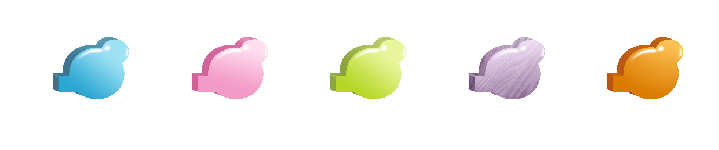

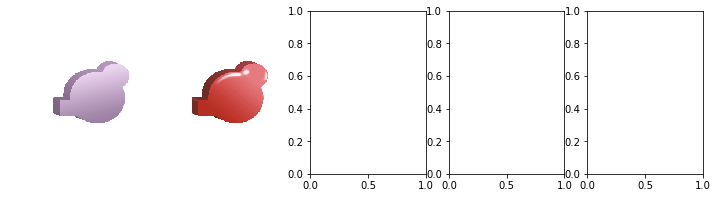




Category: fake2


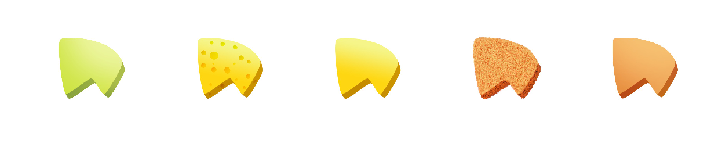

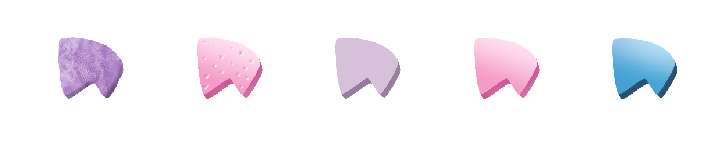

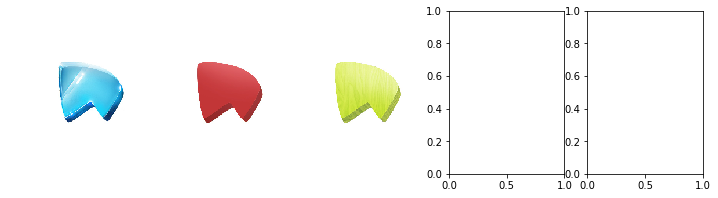




Category: wif


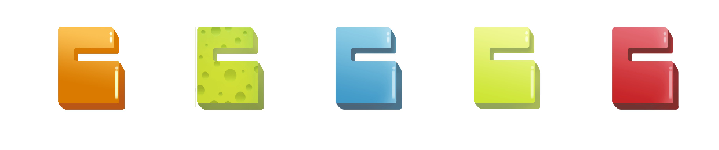

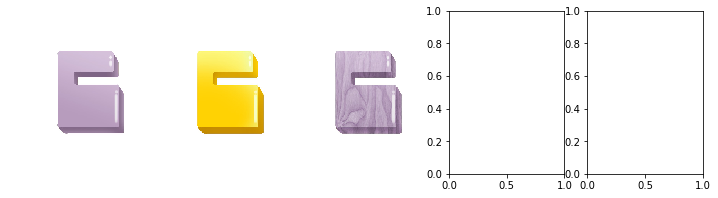




Category: fake5


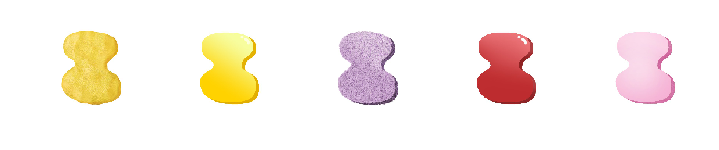

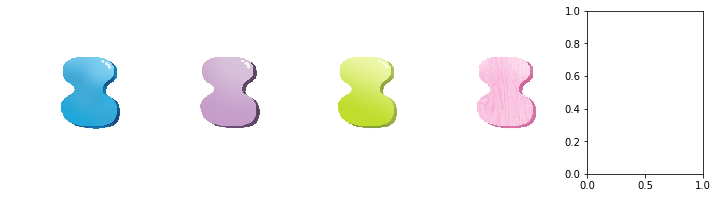




Category: fake1


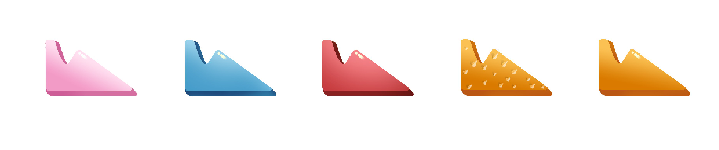

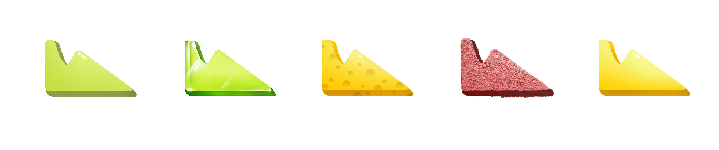

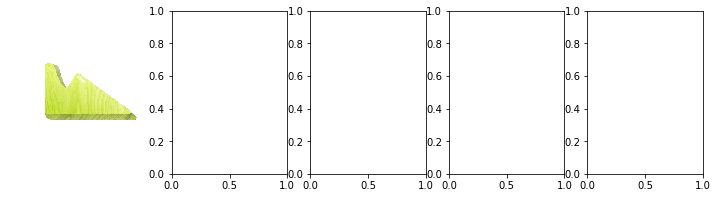




Category: zup


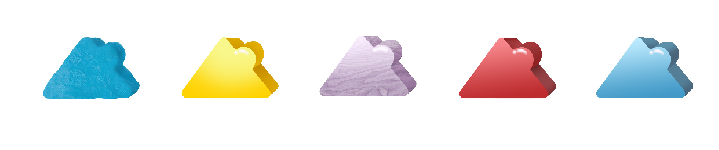

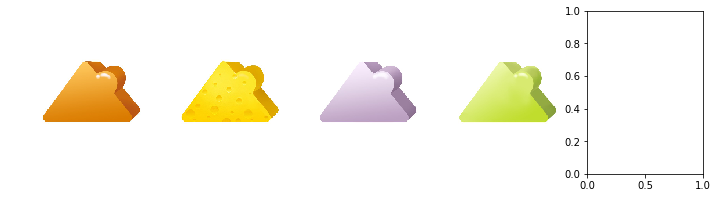




Category: fake3


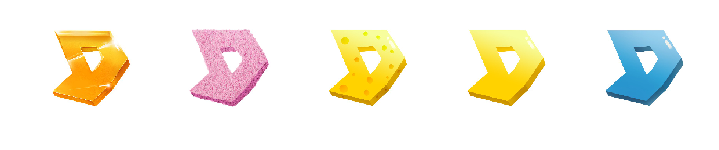

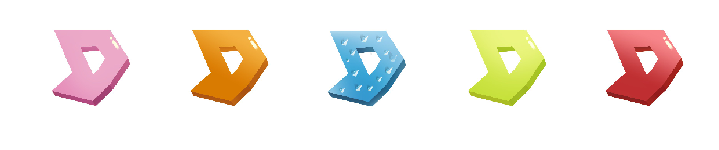

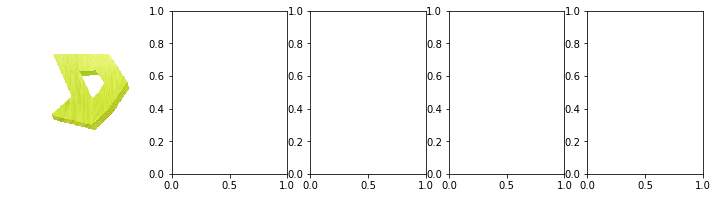




Category: fake4


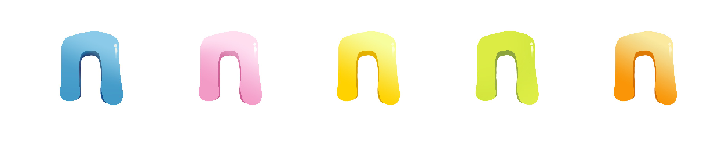

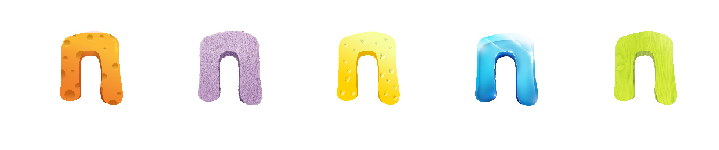

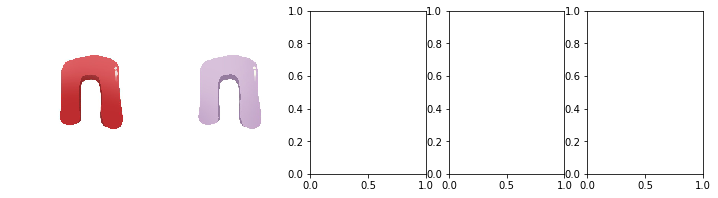

In [48]:
plot_by_feature(X, shapes)

# Separate samples by color

Category: purple


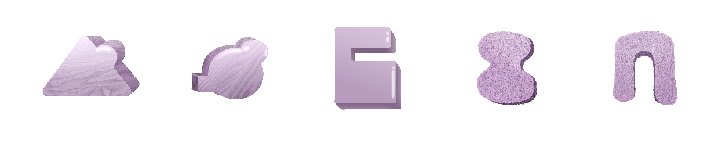

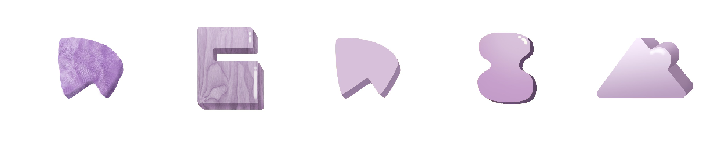

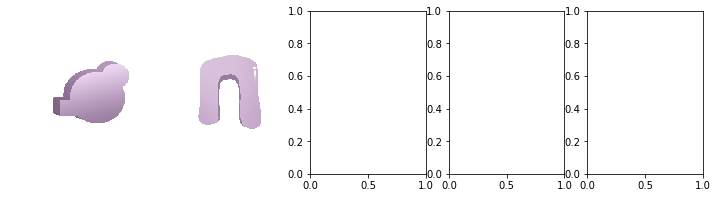




Category: red


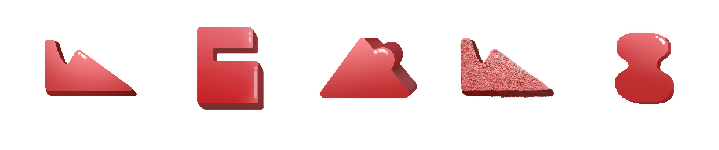

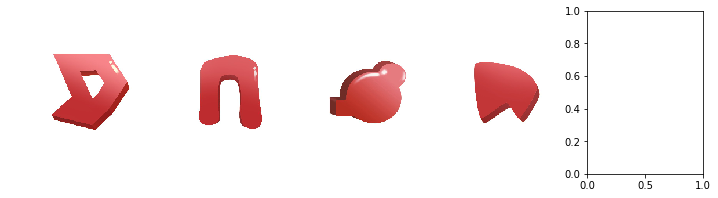




Category: orange


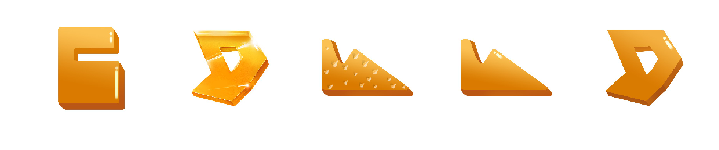

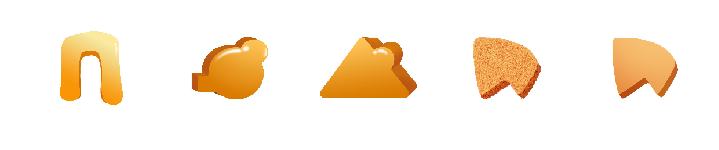

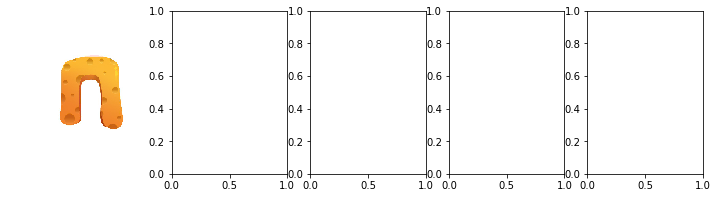




Category: green


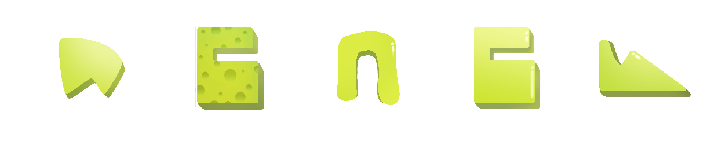

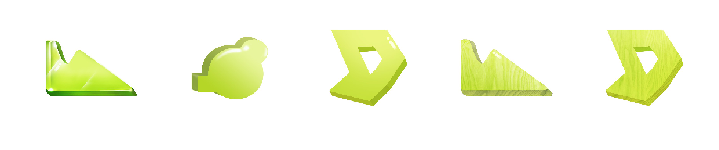

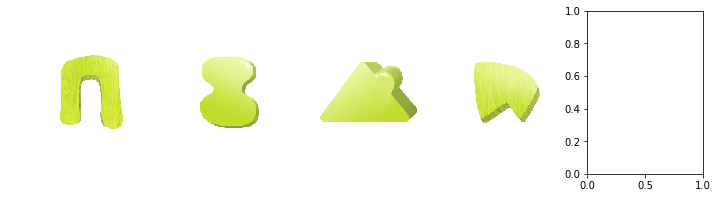




Category: blue


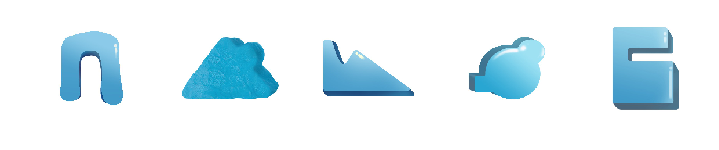

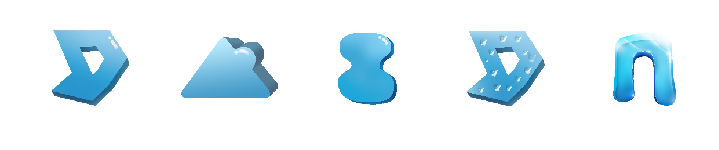

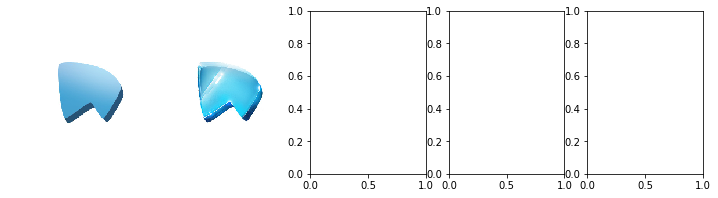




Category: pink


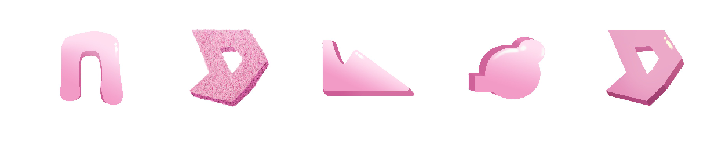

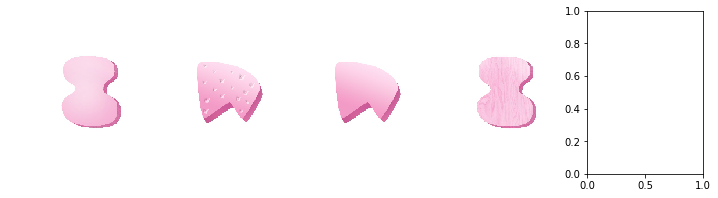




Category: yellow


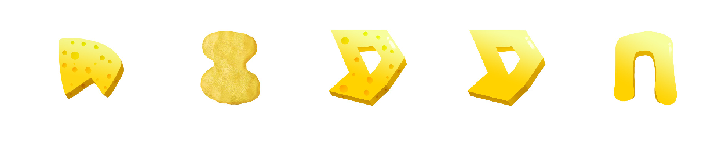

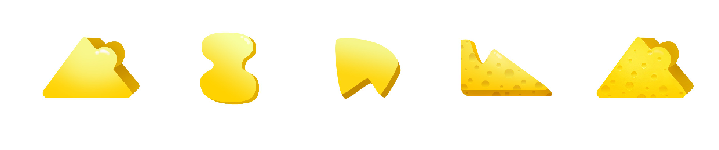

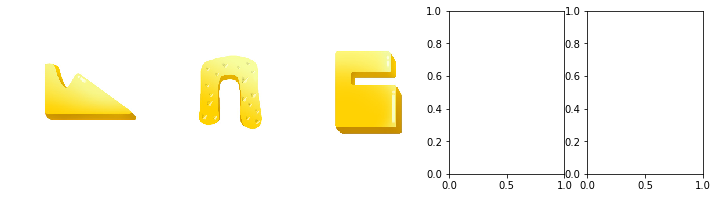

In [49]:
plot_by_feature(X, colors)

# Separate samples by texture

Category: glass


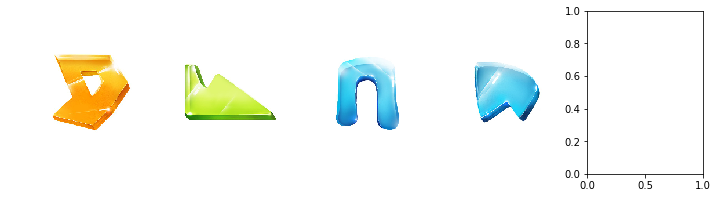




Category: x


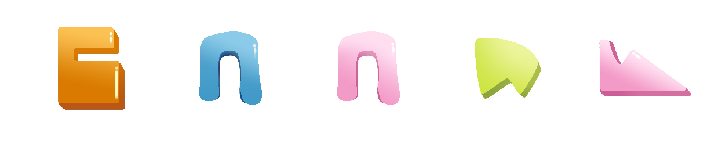

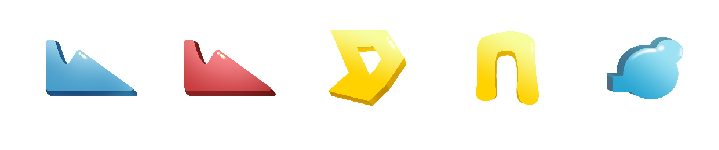

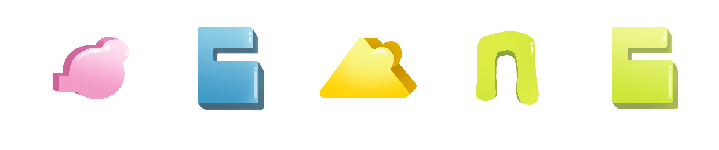

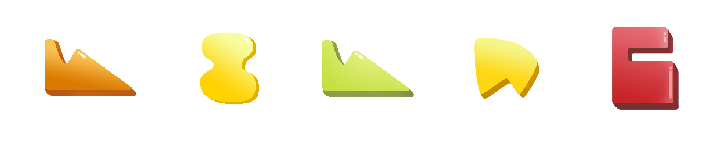

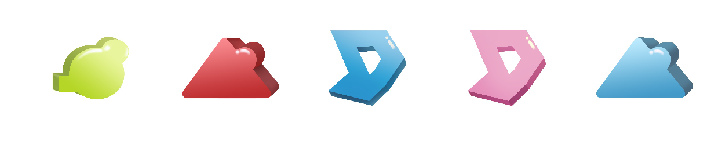

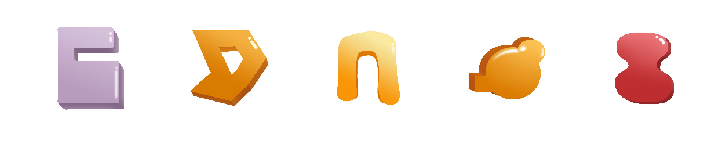

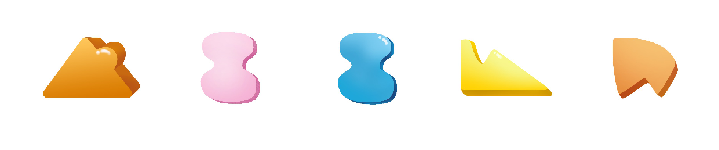

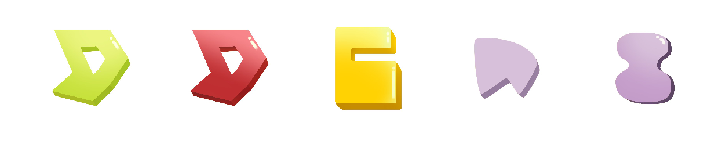

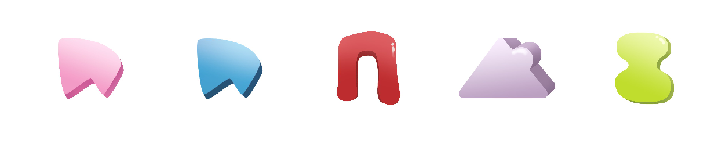

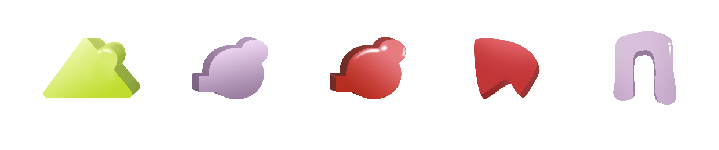




Category: carpet


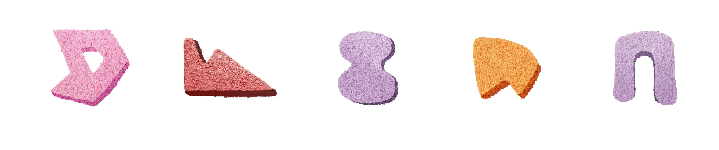




Category: sponge


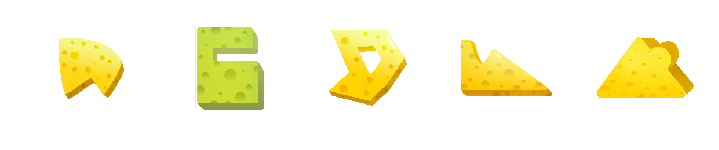

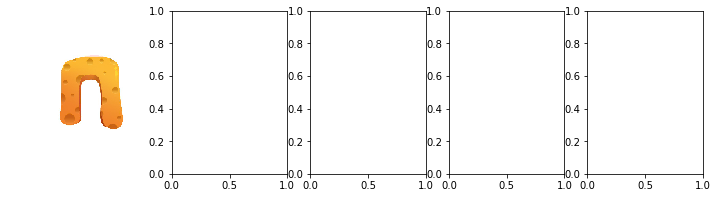




Category: wood


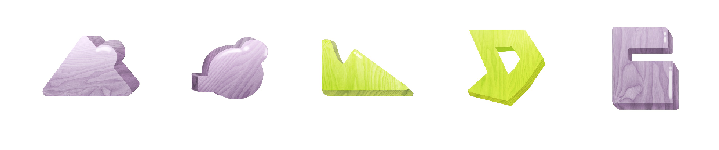

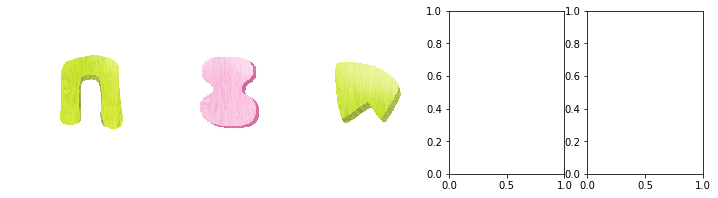




Category: clay


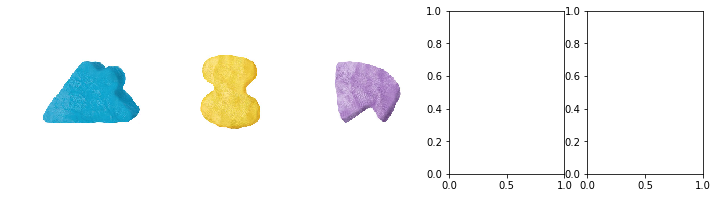




Category: spikes


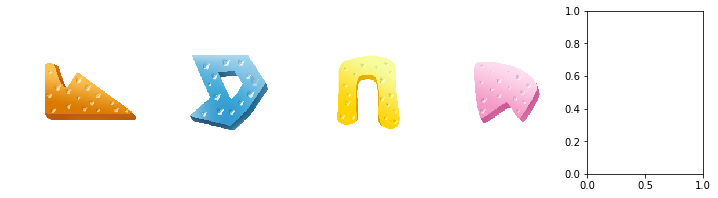

In [50]:
plot_by_feature(X, textures)